In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
plt.style.use('dark_background')

77 354 3


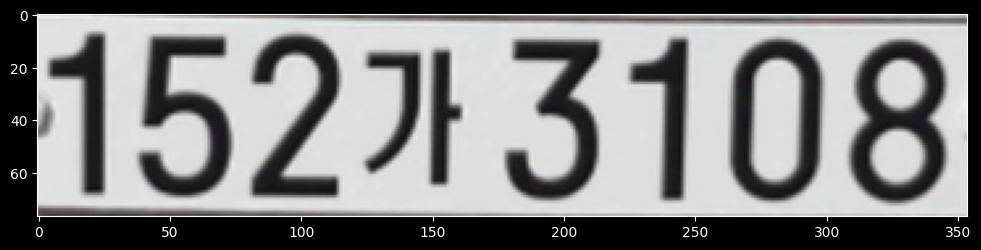

In [2]:
img_ori = cv2.imread('4.png')

height, width, channel = img_ori.shape
gray = cv2.cvtColor(img_ori, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(12, 10))
plt.imshow(img_ori,cmap='gray')
print(height, width, channel)


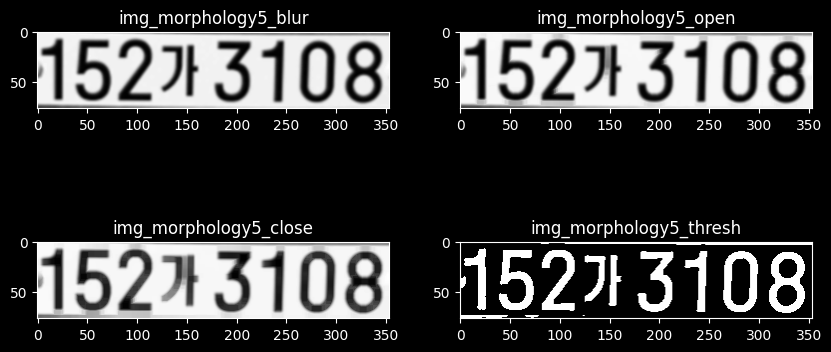

In [6]:
img_blurred = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)

img_blur_thresh = cv2.adaptiveThreshold(
    img_blurred,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)
kernel3 = np.ones((3,3),np.uint8)
img_morphology3 = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel3)
img_morphology3_open = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel3)
img_morphology3 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel3)
img_morphology3_close = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel3)
img_morphology3_thresh = cv2.adaptiveThreshold(
    img_morphology3,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)
kernel5 = np.ones((5,5),np.uint8)
img_morphology5_blur = cv2.GaussianBlur(gray, ksize=(5, 5), sigmaX=0)
img_morphology5= cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel5)
img_morphology5_open= cv2.morphologyEx(img_morphology5_blur, cv2.MORPH_OPEN, kernel5)
img_morphology5 = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel5)
img_morphology5_close = cv2.morphologyEx(img_morphology5_open, cv2.MORPH_CLOSE, kernel5)
img_morphology5_thresh = cv2.adaptiveThreshold(
    img_morphology5_close,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)
# img_blur_morphology5 = img_blur_thresh
img_blur_morphology5 = cv2.adaptiveThreshold(
    gray,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)
img_blur_morphology5_thresh = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel5)
img_blur_morphology5_thresh_open = cv2.morphologyEx(img_blur_morphology5, cv2.MORPH_OPEN, kernel5)
img_blur_morphology5_thresh = cv2.morphologyEx(gray, cv2.MORPH_CLOSE, kernel5)
img_blur_morphology5_thresh_close = cv2.morphologyEx(img_blur_morphology5_thresh_open, cv2.MORPH_CLOSE, kernel5)
img_morphology5_thresh_close_blur = cv2.GaussianBlur(img_blur_morphology5_thresh_close, ksize=(5, 5), sigmaX=0)
img_blur_morphology5_thresh = cv2.adaptiveThreshold(
    img_morphology5_thresh_close_blur,
    maxValue=255.0,
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    thresholdType=cv2.THRESH_BINARY_INV,
    blockSize=19,
    C=9
)



plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('img_morphology5_blur')
plt.imshow(img_morphology5_blur, cmap='gray')
plt.subplot(2,2,2)
plt.title('img_morphology5_open')
plt.imshow(img_morphology5_open, cmap='gray')
plt.subplot(2,2,3)
plt.title('img_morphology5_close')
plt.imshow(img_morphology5_close, cmap='gray')
plt.subplot(2,2,4)
plt.title('img_morphology5_thresh')
plt.imshow(img_morphology5_thresh, cmap='gray')

morphology5 text : 152가3108

morphology3 text : 152가3108

blur and morphology5 text : 1524281[08

blur text : 152가2108



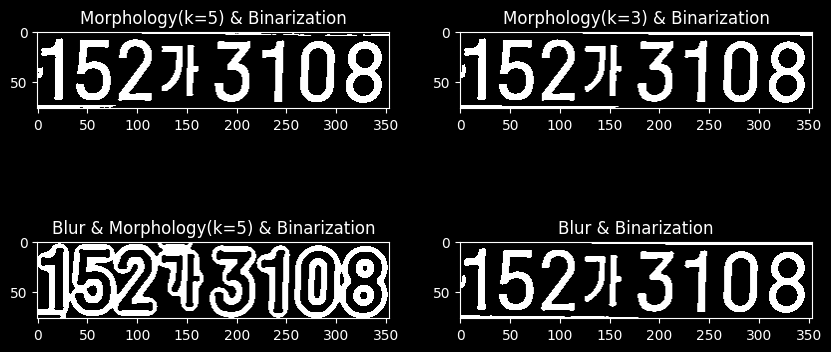

In [28]:
pytesseract.pytesseract.tesseract_cmd = 'C:\\tesseract\\tesseract\\tesseract'
config = ('-l kor --oem 3 --psm 7')


plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.title('Morphology(k=5) & Binarization')
plt.imshow(img_morphology5_thresh, cmap='gray')
plt.subplot(2,2,2)
plt.title('Morphology(k=3) & Binarization')
plt.imshow(img_morphology3_thresh, cmap='gray')
plt.subplot(2,2,3)
plt.title('Blur & Morphology(k=5) & Binarization')
plt.imshow(img_blur_morphology5_thresh, cmap='gray')
plt.subplot(2,2,4)
plt.title('Blur & Binarization')
plt.imshow(img_blur_thresh, cmap='gray')

morphology_text5 = pytesseract.image_to_string(img_morphology5_thresh, config=config)
print("morphology5 text : " + morphology_text5)
morphology_text3 = pytesseract.image_to_string(img_morphology3_thresh, config=config)
print("morphology3 text : " + morphology_text3)
morphology_text2 = pytesseract.image_to_string(img_blur_morphology5_thresh, config=config)
print("blur and morphology5 text : " + morphology_text2)
blur_text = pytesseract.image_to_string(img_blur_thresh, config=config)
print("blur text : " + blur_text)
